# Titanic Survival Prediction

In this data science project I am building the machine learning model using classification algorithms to predict if the passenger from the titanic survived or not. The dataset is available here https://www.kaggle.com/datasets/yasserh/titanic-dataset.


##  Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Experimenting two classification algorithms ie. K Nearest Neighbor classifier and Random forest classifier

In [7]:
# from sklearn.neighbors import kNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
df=pd.read_csv("Titanic-Dataset.csv")

## EDA

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking and handling the nan and missing values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
df.shape

(891, 12)

Since Cabin has 687 rows of missing values which is more than 70% of total data and name is not an important attribute
so we drop these columns

In [52]:
df.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [53]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [54]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [55]:
df['Embarked'].fillna("S", inplace=True)


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking how much is the dataset balanced

In [57]:
count=df['Survived'].value_counts()

In [58]:
count

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

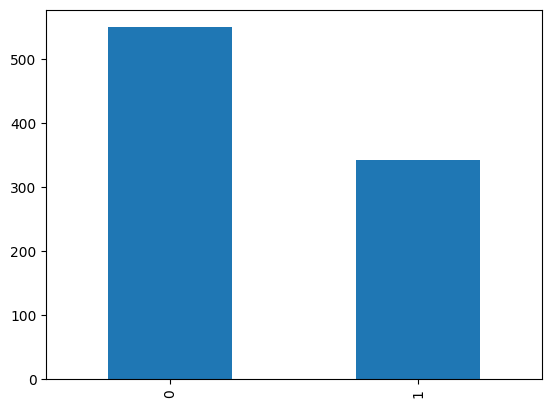

In [59]:
count.plot(kind='bar')


###  Encoding Categorical data

In [60]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


Converting the categorical data into numeric using one hot encoding. get_dummies()
Columns to be encoded: sex, embarked and Pclass

In [61]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [62]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [63]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [64]:
df1=pd.get_dummies(df, columns=["Sex","Embarked", "Pclass"])

In [65]:
df1

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.000000,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,35.000000,0,0,373450,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,211536,13.0000,0,1,0,0,1,0,1,0
887,888,1,19.000000,0,0,112053,30.0000,1,0,0,0,1,1,0,0
888,889,0,29.699118,1,2,W./C. 6607,23.4500,1,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,111369,30.0000,0,1,1,0,0,1,0,0


### Standard Scaling

Scaling columns Age and Fare use standardscaler. Its basically z-score normalization.

z=(x-u)/sd where x=value, u=mean(0), rho=standard deviation(1)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaling=StandardScaler()

In [69]:
df1[["Age", "SibSp", "Parch", "Fare"]]=scaling.fit_transform(df1[["Age", "SibSp", "Parch", "Fare" ]])

In [70]:
df1

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,0,1,0,0,1,0,0,1
1,2,1,0.638789,0.432793,-0.473674,PC 17599,0.786845,1,0,1,0,0,1,0,0
2,3,1,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,1,0,0,0,1,0,0,1
3,4,1,0.407926,0.432793,-0.473674,113803,0.420730,1,0,0,0,1,1,0,0
4,5,0,0.407926,-0.474545,-0.473674,373450,-0.486337,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.207709,-0.474545,-0.473674,211536,-0.386671,0,1,0,0,1,0,1,0
887,888,1,-0.823344,-0.474545,-0.473674,112053,-0.044381,1,0,0,0,1,1,0,0
888,889,0,0.000000,0.432793,2.008933,W./C. 6607,-0.176263,1,0,0,0,1,0,0,1
889,890,1,-0.284663,-0.474545,-0.473674,111369,-0.044381,0,1,1,0,0,1,0,0


In [72]:
print("hello")

hello
